Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

In [ ]:
# There is a positive correlation between height and volume i.e. the higher the tree,
# the higher the volume of the tree. But there is huge variance in the values

(b) Describe the relationship between volume and diameter of these trees.  

In [ ]:
# There is a positive correlation between diameter and volume i.e. the bigger the diameter of the tree,
# the higher the volume of the tree.

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

In [ ]:
# I would go diameter as the variance is much lower

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

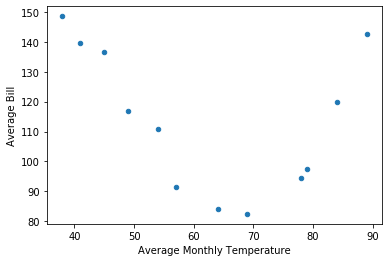

In [14]:
import pandas as pd

utils = pd.read_csv("data/utils.csv")
utils.head()
utils.plot(x='Average Monthly Temperature', 
          y='Average Bill', 
          kind='scatter');

Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

In [4]:
utils.describe()

,Average Bill,Average Monthly Temperature
count,12.000000,12.00000
mean,113.750000,62.25000
std,23.861818,17.51428
min,82.500000,38.00000
25%,93.750000,48.00000
50%,114.000000,60.50000
75%,137.250000,78.25000
max,148.500000,89.00000


From visual inspection, what is the relationship between the variables?

In [ ]:
# With low average temperatures, the average utility bills are higher which makes sense due to increased
# heating costs. With temperatures increasing, the heating costs decrease up to the point where the utility
# bills start to rise again due to air conditioning.

Fit a simple linear regression using OLS.  

In [40]:
# A scatter plot is quite meaningless in this case as the residuals exhibit heteroscedasticity.
import statsmodels.api as sms

X = utils[['Average Monthly Temperature']]
#X = sms.add_constant(X)
X.head(12)

y = utils["Average Bill"]
y.head()

X = sms.add_constant(X)
model = sms.OLS(y, X)
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 28 Oct 2019   Prob (F-statistic):              0.261
Time:                        13:07:52   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         143.6228     25.995      5.525      0.000      85.701     201.544
Average Monthly Temperature    -0.4799      0.403     -1.190      0.261      -1.378       0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

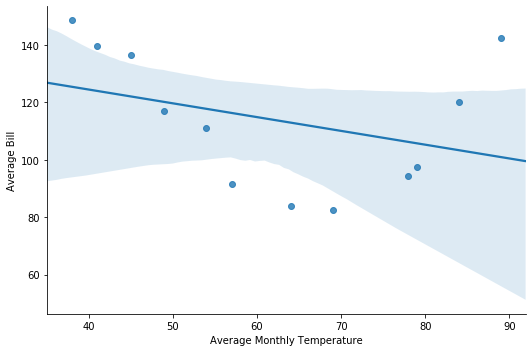

In [23]:
import seaborn as sns
sns.lmplot('Average Monthly Temperature', 'Average Bill', data=utils, aspect=1.5);

Calculate and interpret the value of $R^2$.  

In [24]:
results.rsquared
# A value of 0.86 of the r squared means that .86 % of the variance of the residuals are
# explained by the independent variable

0.8623639061996422

Interpret the intercept and slope coefficients in terms a home owner would understand.

In [28]:
# The intercept in this case is the bill for an average temperature of 0. The slope coefficient shows how much
 # the bill falls or rises with rising average temperatures.
    
results.params

const                          143.622805
Average Monthly Temperature     -0.479884
dtype: float64

What is the 95% confidence interval for the intercept?  

In [26]:
results.conf_int()

,0,1
const,85.701257,201.544353
Average Monthly Temperature,-1.378325,0.418556


Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

In [ ]:
# No it is not as there is a structural break in the data. at the beginning utility bill is falling with raising 
# temperatures but after a certain point it starts rraising again with raising temperatures due to needed air
# conditioning

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [49]:
results.predict((1,120))

array([86.03667482])

<br>
<br> 
<br>

----